In [1060]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import handy
import glob
from joblib import Parallel, delayed
import sigpy as sp
import sigpy.plot as pl
import sigpy.mri as mr
from scipy.io import loadmat
from scipy.io import savemat
import sys
import math
from scipy import signal
from itertools import product

In [17]:
path_caipi_data = '200403_caipi_pilot/'

In [18]:
datalist = sorted(glob.glob(path_caipi_data+"raw*.mat"))
datalist

['200403_caipi_pilot\\raw_001_full.mat',
 '200403_caipi_pilot\\raw_002_sense2x2.mat',
 '200403_caipi_pilot\\raw_003_sense2x3.mat',
 '200403_caipi_pilot\\raw_004_caipi2x2.mat',
 '200403_caipi_pilot\\raw_005_caipi2x3.mat',
 '200403_caipi_pilot\\raw_006_caipi2x2_fullcenter.mat',
 '200403_caipi_pilot\\raw_007_caipi2x3_fullcenter.mat']

In [1115]:
fdata = handy.read_matlab(datalist[-2])

In [1116]:
full = fdata['alldata']['real']+1j*fdata['alldata']['imag']

In [1117]:
full.shape

(32, 116, 108, 108)

In [382]:
data_help = Parallel(n_jobs=-1,backend='loky')(delayed(handy.read_matlab)(datalist[i]) for i in range(len(datalist)))

In [383]:
data_complex = [data_help[i]['alldata']['real']+1j*data_help[i]['alldata']['imag'] for i in range(len(datalist))]

In [359]:
ksp = np.load('cartesian_ksp.npy')
ksp.shape

(8, 230, 180)

In [348]:
data_complex[6].shape

(32, 116, 108, 108)

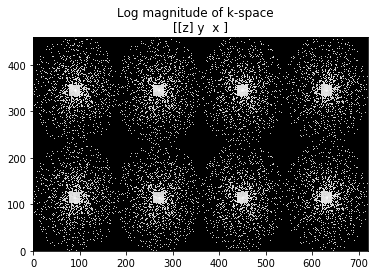

In [360]:
pl.ImagePlot(ksp, mode='l',z=0, title='Log magnitude of k-space')

In [439]:
data_complex[6].shape

(32, 116, 108, 108)

In [414]:
img_shift = sp.ifft(data_complex[0],axes=(1,2,3))
img_noshift = np.fft.fftshift(np.fft.ifftn(data_complex[0],axes=(1,2,3)),axes=(1,2,3))

In [1134]:
imgk = full
imgfull = np.fft.fftshift(np.fft.ifftn(imgk,axes=(1,2,3)),axes=(2,3))

In [1132]:
imgk = full
imgfull = sp.ifft(imgk,axes=(1,2,3))

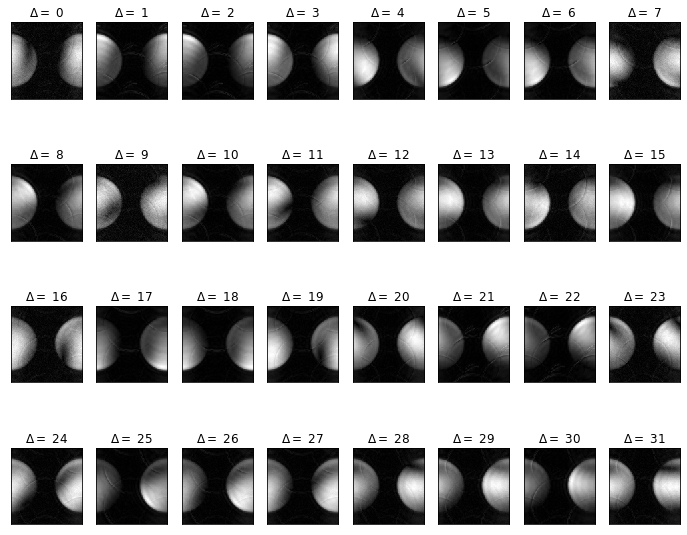

In [1137]:
handy.plot_patterns(abs(imgfull[:,:,30,:]))

In [450]:
data_complex[5].shape

(32, 116, 108, 108)

In [418]:
def take_center(array,size):
    """Takes the center data of an array

    Parameters:
        array (numpy array): array of data
        size (int): percentage of the array

    Returns (numpy array): center of array 
    """
    size /= 200
    Nc,Nx,Ny,Nz = array.shape
    nx,ny,nz = int(Nx/2), int(Ny/2),int(Nz/2)
    rx,ry,rz = math.ceil(Nx*size), math.ceil(Ny*size), math.ceil(Nz*size)
    reduced = array[:,nx-rx:nx+rx,ny-ry:ny+ry,nz-rz:nz+rz]
    print(nx,ny,nz,rx,ry,rz)
    return reduced

In [325]:
centerk = take_center(data_complex[1],10)
print(centerk.shape,data_complex[1].shape)

29 54 26 3 6 3
(32, 6, 12, 6) (32, 58, 108, 53)


In [12]:
centerk[:3].shape

(3, 6, 12, 6)

In [38]:
espiritfull = mr.app.EspiritCalib(centerk[:10],kernel_width=6,show_pbar=True).run()

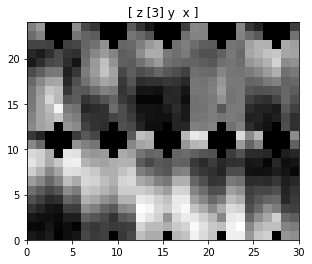

In [39]:
pl.ImagePlot(espiritfull,z=0)

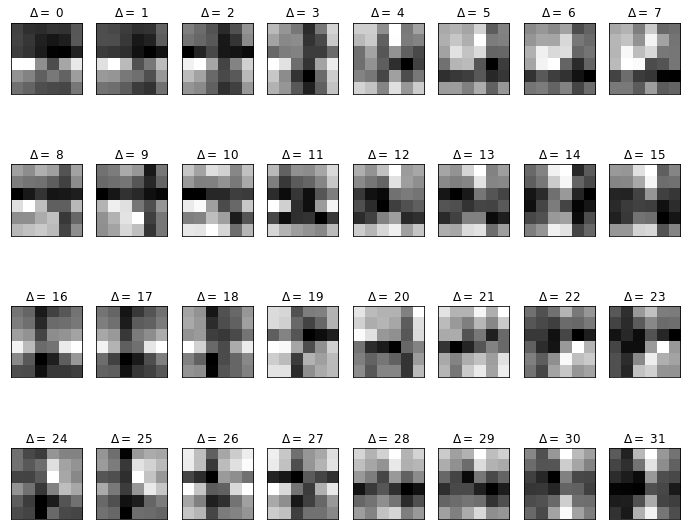

In [132]:
centerimg = sp.ifft(centerk,axes=(1,2,3))
handy.plot_patterns(abs(centerimg)[:,:,6,:],8)

In [59]:
datalist

['/home/jamalzada/bart-workshop/demos/gfactor-demo/200403_caipi_pilot/raw_001_full.mat',
 '/home/jamalzada/bart-workshop/demos/gfactor-demo/200403_caipi_pilot/raw_002_sense2x2.mat',
 '/home/jamalzada/bart-workshop/demos/gfactor-demo/200403_caipi_pilot/raw_003_sense2x3.mat',
 '/home/jamalzada/bart-workshop/demos/gfactor-demo/200403_caipi_pilot/raw_004_caipi2x2.mat',
 '/home/jamalzada/bart-workshop/demos/gfactor-demo/200403_caipi_pilot/raw_005_caipi2x3.mat',
 '/home/jamalzada/bart-workshop/demos/gfactor-demo/200403_caipi_pilot/raw_006_caipi2x2_fullcenter.mat',
 '/home/jamalzada/bart-workshop/demos/gfactor-demo/200403_caipi_pilot/raw_007_caipi2x3_fullcenter.mat']

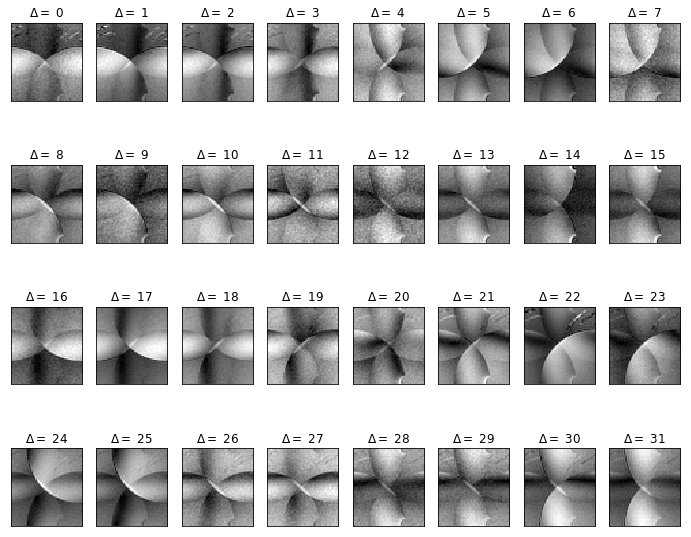

In [138]:

handy.plot_patterns(abs(img_shift)[:,:,50,:],8)

In [ ]:
signal.convolve()

In [466]:
path = 'raw_data.mat'
data = handy.read_matlab(path)
ksp = data['raw'].squeeze()
sdata = loadmat('sref.mat')
g=sdata['s_ref']
raw = ksp['real']+1j*ksp['imag']
sref=np.copy(g)

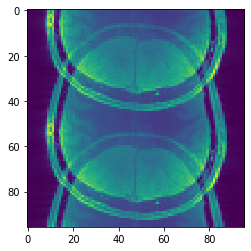

In [463]:
img_combined = np.sqrt(np.sum(abs(img)**2,axis=0))
plt.imshow(img_combined)

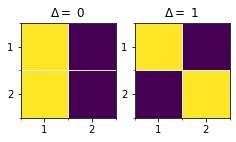

In [467]:
R=2
p=handy.caipi(R,1,[0,1])
handy.plot_caipi(p,[0,1])
h = int(96/R)
mask = np.kron(np.ones((h,h)),p[0].T)
#mask=1

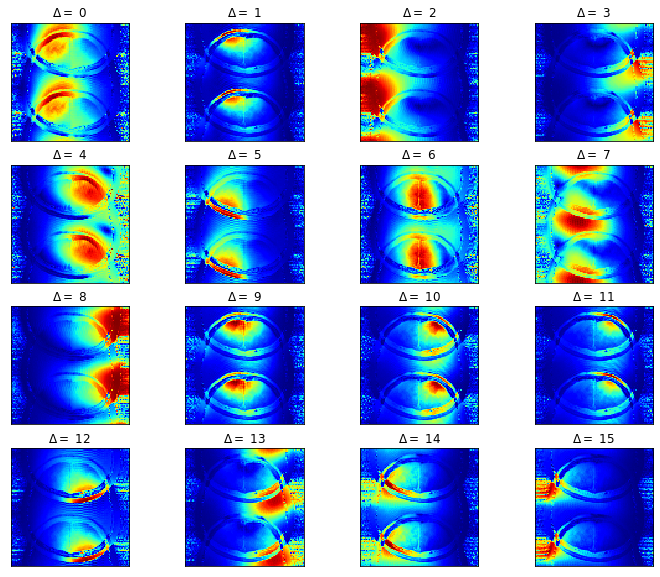

In [464]:
s0 = img/img_combined
handy.plot_patterns(abs(s0),4,'jet')

In [465]:
Nx,Ny,Nz,Nc = 96,96,1,16
kernel = np.full((9,9),9**-2)
s1 = np.zeros((Nx,Ny,Nz,Nc))
for i in range(16):
    s1[:,:,0,i] = signal.convolve()

TypeError: convolve() missing 2 required positional arguments: 'in1' and 'in2'

In [473]:
path = 'raw_data.mat'
data = handy.read_matlab(path)
ksp = data['raw'].squeeze()
sdata = loadmat('sref.mat')
g=sdata['s_ref']
raw = ksp['real']+1j*ksp['imag']
sref=np.copy(g)

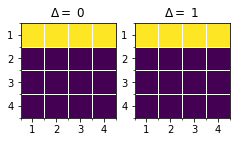

In [1174]:
R=4
p=handy.caipi(R,4,[0,1])
handy.plot_caipi(p,[0,1])
h = int(96/R)
mask = np.kron(np.ones((h,h)),p[0].T)
#mask=1

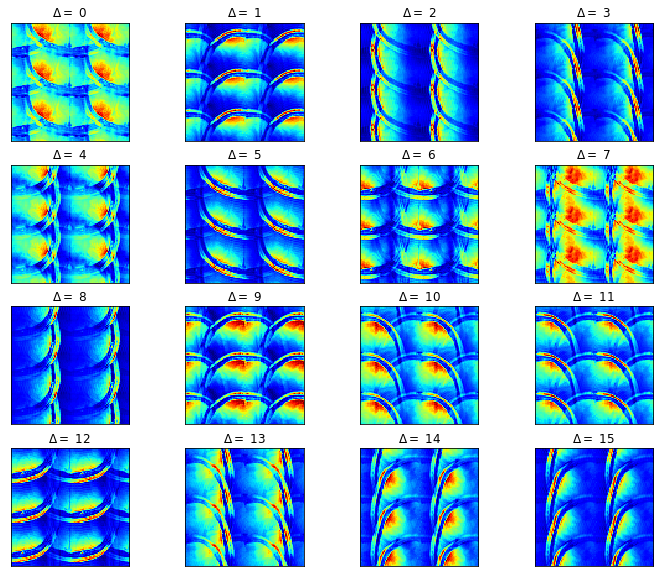

In [1165]:
img = sp.ifft(mask*raw,axes=(1,2))
img_r2 = handy.swap(img)[:,:,None,:]
handy.plot_patterns(abs(img),4,'jet')

In [713]:
def sense(img,csm,R):
    [Nx,Ny,Nz,Nc] = img.shape
    out = np.zeros((Nx,Ny),dtype=complex)
    h = int(Nx/R)
    #print(h)
    for x in np.arange(h):
        x_idx = np.arange(x,Nx,h)
        
        for y in np.arange(Ny):
            S = csm[x_idx,y,0,:].T
            #S = np.reshape(csm[x_idx,y,0,:],(R,-1)).T
            hulp = np.reshape(img[x,y,0,:],(-1,1))
            out[x_idx,y] = (np.linalg.pinv(S)@hulp).squeeze()
        #print(S.shape,hulp.shape)
            #print(x_idx,y)
            
    return out

In [1083]:
def sense3(img,csm,rx,ry):
    R = rx*ry
    [Nx,Ny,Nz,Nc] = img.shape
    out = np.zeros((Nx,Ny),dtype=complex)
    hx = int(Nx/rx)
    hy = int(Ny/ry)
    for x in np.arange(hx): # loop along x-coordinates
        x_idx = np.arange(x,Nx,hx)
        for y in np.arange(hy): # loop along y-coordinates
            y_idx = np.arange(y,Ny,hy)[:]
            coord = np.array(list(product(x_idx,y_idx)))
            x_alias = csm[coord[:,0],coord[:,1],0,:]
            S = np.reshape(x_alias,(R,-1)).T
            hulp = np.reshape(img[x,y,0,:],(-1,1))
            vhelp = (np.linalg.pinv(S)@hulp).squeeze()
            #m = np.reshape(vhelp,(rx,ry))
            #print("this is m\n", m)
            out[coord[:,0],coord[:,1]] = vhelp
            #print(out[x_idx,:][:,y_idx])
            #print(x_idx,y,'and',x,y_idx)
    return out

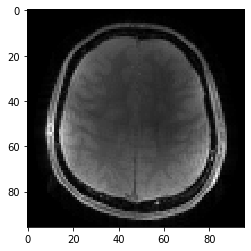

In [1169]:

rec = sense3(img_r2,sref,3,2)
plt.imshow(abs(rec),'gray')


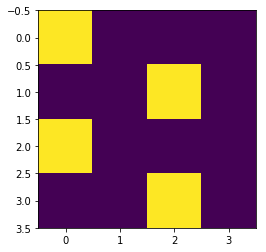

In [22]:
plt.imshow(abs(np.fft.ifftn(p[1])))

In [27]:
np.fft.ifftn(p[1])

array([[0.25+0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j],
       [0.25+0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j]])

In [28]:
np.fft.fftshift([1,2,0,2,4,5,-1,-5,5])

array([ 5, -1, -5,  5,  1,  2,  0,  2,  4])

In [32]:
freqs = np.fft.fftfreq(9, d=1/9).reshape(3,3)
freqs

array([[ 0.,  1.,  2.],
       [ 3.,  4., -4.],
       [-3., -2., -1.]])

In [39]:
np.fft.fftshift(freqs)

array([[-1., -3., -2.],
       [ 2.,  0.,  1.],
       [-4.,  3.,  4.]])

In [47]:
fre =np.arange(16).reshape(4,4)
fre[0,0]=10
fre

array([[10,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

[[ 8.125+0.j   0.125-0.5j  0.125+0.j   0.125+0.5j]
 [-1.375-2.j   0.625+0.j   0.625+0.j   0.625+0.j ]
 [-1.375+0.j   0.625+0.j   0.625+0.j   0.625+0.j ]
 [-1.375+2.j   0.625+0.j   0.625+0.j   0.625+0.j ]]


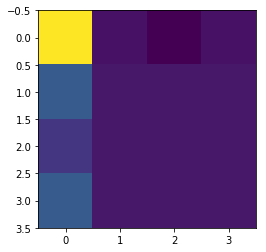

In [69]:
k = np.fft.ifftn(fre)
print(k)
plt.imshow(abs(k))

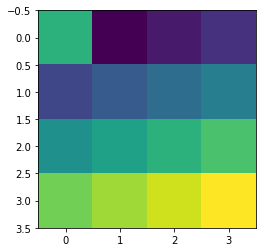

In [71]:
plt.imshow(fre)

In [72]:
kc=np.fft.ifftn(fre*p[1])
kc

array([[ 2. +0.j   ,  0.5-0.125j, -0.5+0.j   ,  0.5+0.125j],
       [-0.5+0.j   ,  0.5+0.125j,  2. +0.j   ,  0.5-0.125j],
       [ 2. +0.j   ,  0.5-0.125j, -0.5+0.j   ,  0.5+0.125j],
       [-0.5+0.j   ,  0.5+0.125j,  2. +0.j   ,  0.5-0.125j]])

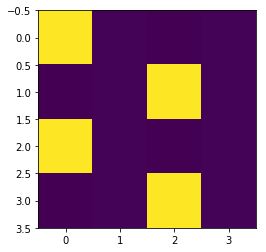

In [73]:
plt.imshow(abs(kc))

In [64]:
abs(kc)

array([[2.       , 0.5153882, 0.5      , 0.5153882],
       [0.5      , 0.5153882, 2.       , 0.5153882],
       [2.       , 0.5153882, 0.5      , 0.5153882],
       [0.5      , 0.5153882, 2.       , 0.5153882]])

In [65]:
fre*p[1]

array([[10.,  0.,  2.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  9.,  0., 11.],
       [ 0.,  0.,  0.,  0.]])

In [74]:
for i in (1+range(10)):

SyntaxError: unexpected EOF while parsing (<ipython-input-74-45d7d1bcc8b4>, line 1)